In [0]:
device = torch.device("cuda:0")

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch
import time
start_time = time.time()
import torch.nn as nn 
import torchvision.datasets as dsets 
import torchvision.transforms as transforms 
import torch.nn.functional as fun
from torch.autograd import Variable 
device = torch.device("cuda:0")
# Hyper Parameters  
input_size = 1024
num_classes = 10
hidden_size = 300  
num_epochs = 10
batch_size = 100
learning_rate = 0.2
# MNIST Dataset (Images and Labels) 
train_dataset = dsets.SVHN(root ='./data', 
							transform = transforms.ToTensor(), 
							download = True) 

test_dataset = dsets.SVHN(root ='./data', 
						download = True, 
						transform = transforms.ToTensor()) 
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, 
										batch_size = batch_size, 
										shuffle = True) 

test_loader = torch.utils.data.DataLoader(dataset = test_dataset, 
										batch_size = batch_size, 
										shuffle = False) 
class SVHN(nn.Module):
    def __init__(self):
        super(SVHN, self).__init__() 
        self.conv1 = nn.Conv2d(3, 64, 4, 1, 0)#  картинка цветная => 3 - так как RGB; 64 - выходов или подслоев,
        #каждый подслой имеет свои веса ;#input,output,kernel,stride,padding; выход тензоры 29x29 (28-kernel+1)
        self.conv2 = nn.Conv2d(64, 128, 4, 1, 1)#padding=1 =>31x31    (31-4+1)=> выход 28x28 по 128 каналам
        self.maxpool2 = nn.MaxPool2d(2)#выход 14x14 по 128 каналам => 14x14x128=25088
        self.relu = nn.ReLU() 
        self.dropout2d = nn.Dropout2d()
        self.fc1 = nn.Linear(25088, 1024)
        self.fc2 = nn.Linear(1024, 10)

    def forward(self, x): 
        out = self.relu(self.conv1(x))
        #print(out.size())
        out = self.relu(self.maxpool2(self.dropout2d(self.conv2(out))))
        #print(out.size())
        out = out.view(-1, 25088)
        out = self.relu(self.fc1(out)) 
        out = self.fc2(out) 
        return out 

model = SVHN() 
model.to(device)
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) 

Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/train_32x32.mat


In [0]:
# Training the Model

for epoch in range(num_epochs): 
    for i, (images, labels) in enumerate(train_loader): 
        images = images.to(device)
        labels = labels.to(device)
        # Forward + Backward + Optimize 
        optimizer.zero_grad() 
        outputs = model(images)
        outputs=outputs.to(device)
        loss = criterion(outputs, labels) 
        loss.backward() 
        optimizer.step() 
  
        if (i + 1) % 100 == 0: 
            print('Epoch: [% d/% d], Step: [% d/% d], Loss: %.4f'
                  % (epoch + 1, num_epochs, i + 1, 
                     len(train_dataset) // batch_size, loss.item()))     
#Test the Model 
correct = 0
total = 0
for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images) 
    _, predicted = torch.max(outputs.data, 1) 
    total += labels.size(0) 
    correct += (predicted == labels).sum() 
  
print('Accuracy of the model on the 73257 test images: % d %%' % ( 
            100 * correct / total))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch: [ 1/ 10], Step: [ 100/ 732], Loss: 2.3393
Epoch: [ 1/ 10], Step: [ 200/ 732], Loss: 2.1713
Epoch: [ 1/ 10], Step: [ 300/ 732], Loss: 1.9459
Epoch: [ 1/ 10], Step: [ 400/ 732], Loss: 1.1452
Epoch: [ 1/ 10], Step: [ 500/ 732], Loss: 0.9880
Epoch: [ 1/ 10], Step: [ 600/ 732], Loss: 0.7277
Epoch: [ 1/ 10], Step: [ 700/ 732], Loss: 0.7026
Epoch: [ 2/ 10], Step: [ 100/ 732], Loss: 0.5115
Epoch: [ 2/ 10], Step: [ 200/ 732], Loss: 0.5886
Epoch: [ 2/ 10], Step: [ 300/ 732], Loss: 0.3590
Epoch: [ 2/ 10], Step: [ 400/ 732], Loss: 0.3973
Epoch: [ 2/ 10], Step: [ 500/ 732], Loss: 0.6908
Epoch: [ 2/ 10], Step: [ 600/ 732], Loss: 0.4918
Epoch: [ 2/ 10], Step: [ 700/ 732], Loss: 0.4199
Epoch: [ 3/ 10], Step: [ 100/ 732], Loss: 0.3087
Epoch: [ 3/ 10], Step: [ 200/ 732], Loss: 0.2841
Epoch: [ 3/ 10], Step: [ 300/ 732], Loss: 0.3076
Epoch: [ 3/ 10], Step: [ 400/ 732], Loss: 0.4987
Epoch: [ 3/ 10], Step: [ 500/ 732], Loss: 0.2838
Epoch: [ 3/ 10], Step: [ 600/ 732], Loss: 0.3395
Epoch: [ 3/ 10], Ste

torch.Size([3, 32, 32])


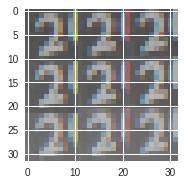

Действительно: tensor(2, device='cuda:0')


In [0]:
from matplotlib import pyplot as plt 
import numpy as np
import scipy.misc 
from PIL import Image
%matplotlib inline
print(images[1].shape)
fig = plt.figure()
plt.subplot(121)
plt.imshow(images[19].reshape(32,32,3))

#plt.imshow(toimage(images[4]))
plt.show()
print("Действительно:",labels[19])

In [0]:
from matplotlib import pyplot as plt 
import numpy as np 
for k in range(0,10):
    first_image = images[k] 
    first_image = np.array(first_image, dtype='float') 
    pixels = first_image.reshape((-1,3,32, 32)) 
    #plt.imshow(pixels, cmap='gray') 
    print("Предсказание:",predicted[k])
    print("Действительно:",labels[k])
    plt.show()

In [0]:
import matplotlib.pyplot as plt
plt.imshow(images[2].reshape(3,32,32))
plt.show()

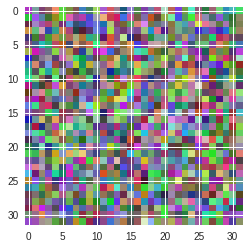

In [0]:
# output is of shape (N, 3, 32, 32)
images = images.reshape((-1,3,32,32))
# output is of shape (N, 32, 32, 3)
images = images.transpose(0,3)
# put data back into a design matrix (N, 3072)
images = images.reshape(-1, 3072)
import matplotlib.pyplot as plt
plt.imshow(images[10].reshape(32,32,3))
plt.show()

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.misc import imshow
images = images.reshape((-1,3,32,32))
images = images.transpose(0,2,3,1)

In [0]:
len(train_dataset)

73257